In [ ]:
import pandas as pd
import numpy as np
import csv

In [11]:
df = pd.read_csv("nacional_covid19.csv")
# To display the top 5 rows 
df.head(5)

,fecha,casos_total,casos_pcr,casos_test_ac,altas,fallecimientos,ingresos_uci,hospitalizados
0,2020-02-21,3.0,3,NaN,NaN,NaN,NaN,NaN
1,2020-02-22,3.0,3,NaN,NaN,NaN,NaN,NaN
2,2020-02-23,3.0,3,NaN,NaN,NaN,NaN,NaN
3,2020-02-24,3.0,3,NaN,NaN,NaN,NaN,NaN
4,2020-02-25,4.0,4,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail(5)

,fecha,casos_total,casos_pcr,casos_test_ac,altas,fallecimientos,ingresos_uci,hospitalizados
258,2020-12-29,NaN,1893502,NaN,NaN,50442.0,18096.0,209496.0
259,2020-12-30,NaN,1910218,NaN,NaN,50689.0,18096.0,209496.0
260,2020-12-31,NaN,1928265,NaN,NaN,50837.0,18251.0,211064.0
261,2021-01-04,NaN,1958844,NaN,NaN,51078.0,18357.0,212212.0
262,2021-01-05,NaN,1982544,NaN,NaN,51430.0,18465.0,213565.0


In [13]:
df.dtypes

fecha              object
casos_total       float64
casos_pcr           int64
casos_test_ac     float64
altas             float64
fallecimientos    float64
ingresos_uci      float64
hospitalizados    float64
dtype: object

In [14]:
df = df.drop(['casos_test_ac', 'altas'], axis=1)
df.head(5)

,fecha,casos_total,casos_pcr,fallecimientos,ingresos_uci,hospitalizados
0,2020-02-21,3.0,3,NaN,NaN,NaN
1,2020-02-22,3.0,3,NaN,NaN,NaN
2,2020-02-23,3.0,3,NaN,NaN,NaN
3,2020-02-24,3.0,3,NaN,NaN,NaN
4,2020-02-25,4.0,4,NaN,NaN,NaN


In [17]:
df = df.rename(columns={"fecha":"Date","casos_total": "Total cases", "casos_pcr": "PCR positive", "fallecimientos": "Death", "ingresos_uci":"ICU cases","hospitalizados": "Hospitalized"})
df.head(5)

,Date,Total cases,PCR positive,Death,ICU cases,Hospitalized
0,2020-02-21,3.0,3,NaN,NaN,NaN
1,2020-02-22,3.0,3,NaN,NaN,NaN
2,2020-02-23,3.0,3,NaN,NaN,NaN
3,2020-02-24,3.0,3,NaN,NaN,NaN
4,2020-02-25,4.0,4,NaN,NaN,NaN


In [18]:
df.shape

(263, 6)

In [19]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [20]:
df.count()

Date            263
Total cases      91
PCR positive    263
Death           251
ICU cases       193
Hospitalized    195
dtype: int64

In [21]:
print(df.isnull().sum())

Date              0
Total cases     172
PCR positive      0
Death            12
ICU cases        70
Hospitalized     68
dtype: int64


<AxesSubplot:xlabel='Total cases'>

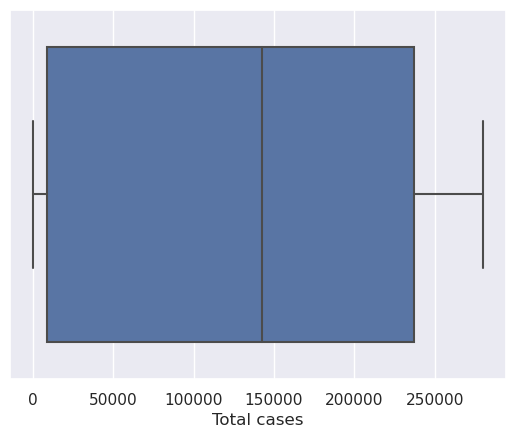

In [27]:
sns.boxplot(x=df['Total cases'])

<AxesSubplot:xlabel='PCR positive'>

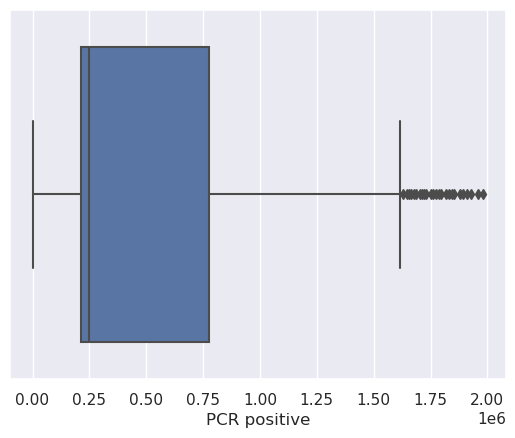

In [28]:
sns.boxplot(x=df['PCR positive'])

<AxesSubplot:xlabel='Death'>

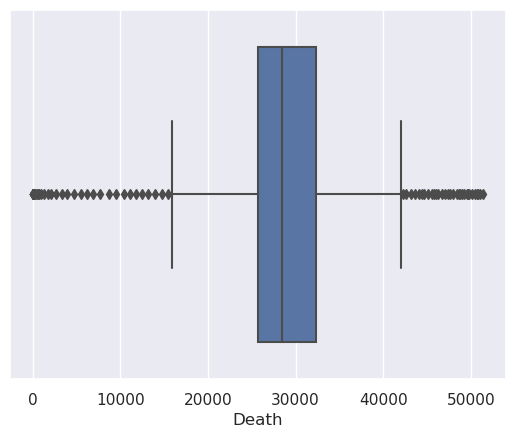

In [29]:
sns.boxplot(x=df['Death'])

<AxesSubplot:xlabel='ICU cases'>

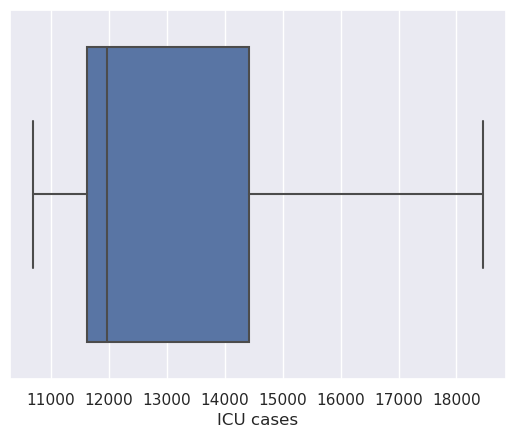

In [30]:
sns.boxplot(x=df['ICU cases'])

<AxesSubplot:xlabel='Hospitalized'>

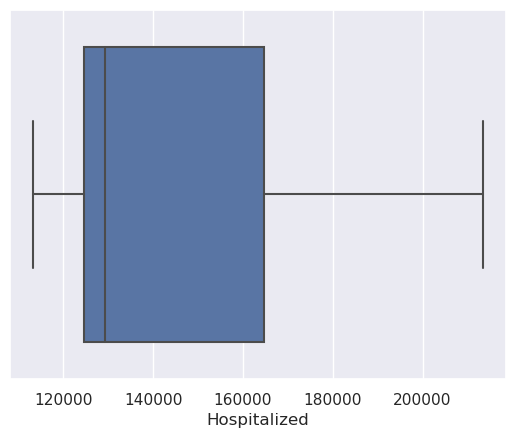

In [31]:
sns.boxplot(x=df['Hospitalized'])

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Total cases     228004.0
PCR positive    562756.5
Death             6623.5
ICU cases         2800.0
Hospitalized     40043.0
dtype: float64


,Total cases,PCR positive,Death,ICU cases,Hospitalized
Total cases,1.000000,0.993237,0.996522,0.990416,0.996894
PCR positive,0.993237,1.000000,0.879751,0.950619,0.985050
Death,0.996522,0.879751,1.000000,0.912783,0.959916
ICU cases,0.990416,0.950619,0.912783,1.000000,0.987288
Hospitalized,0.996894,0.985050,0.959916,0.987288,1.000000


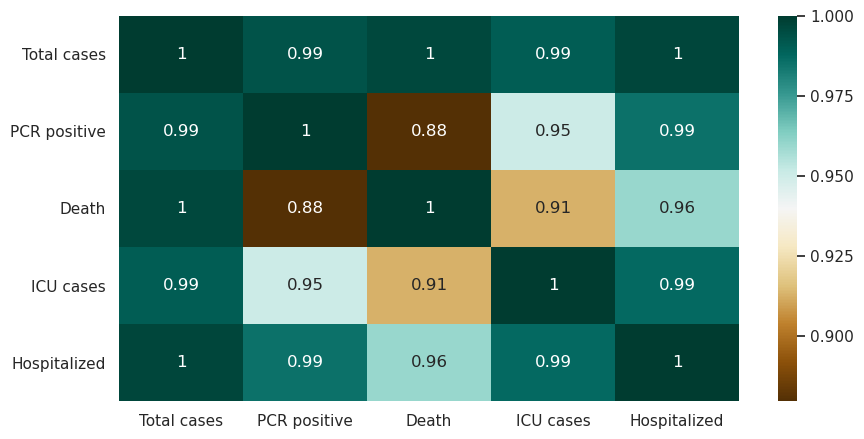

In [34]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

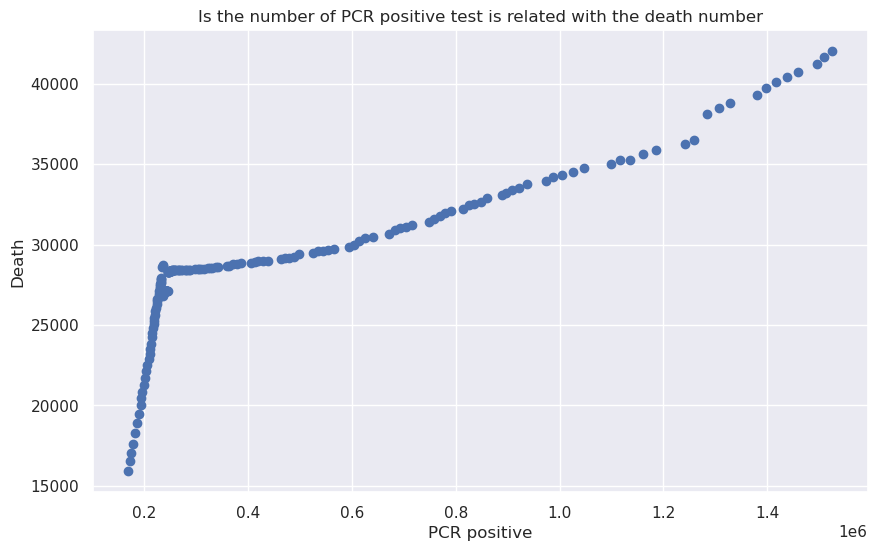

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Is the number of PCR positive test is related with the death number")
ax.scatter(df['PCR positive'], df['Death'])
ax.set_xlabel('PCR positive')
ax.set_ylabel('Death')
plt.show()

In [37]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("ICU cases")
plt.ylabel('ICU cases')
plt.xlabel('PCR positive');


AttributeError: 'DataFrame' object has no attribute 'Make'